### CSE-221710302060-Shaik Shoaib Aslam

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [69]:
df = pd.read_csv('Admission_predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Question 1

### Check the data types and get the summary stats

In [70]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [72]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## Question 2,3

### Imputing Missing values for categorical and numerical columns

In [73]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

#### There are no missing values found in data set .

## Question 4

### Adding Categorical column

In [74]:
df['chance_percent'] = pd.cut(df.iloc[:,-1], bins = [0,0.40,0.80,1.00],
                                labels = ['Low_chance','Moderate_chance','High_chance'])

In [75]:
# Label encoding for Research Column
sample = df.copy()

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sample['Research'] = le.fit_transform(df['Research'])
sample.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,chance_percent
0,1,337,118,4,4.5,4.5,9.65,1,0.92,High_chance
1,2,324,107,4,4.0,4.5,8.87,1,0.76,Moderate_chance
2,3,316,104,3,3.0,3.5,8.00,1,0.72,Moderate_chance
3,4,322,110,3,3.5,2.5,8.67,1,0.80,Moderate_chance
4,5,314,103,2,2.0,3.0,8.21,0,0.65,Moderate_chance


#### Research column encoded using label Encoder

### Encoding Chance_percent Column using dummies

In [77]:
new_df = df.copy()

In [78]:
new_df = pd.concat([df,pd.get_dummies(df['chance_percent'],drop_first = True)],axis = 1)
new_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,chance_percent,Moderate_chance,High_chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92,High_chance,0,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,Moderate_chance,1,0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,Moderate_chance,1,0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,Moderate_chance,1,0
4,5,314,103,2,2.0,3.0,8.21,0,0.65,Moderate_chance,1,0


### Using OneHotEncoder

In [79]:
enc_data = df.copy()

In [80]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [81]:
column_transformer = ColumnTransformer(transformers = [('encoder', OneHotEncoder(),[9])],remainder = 'passthrough')
enc_data = column_transformer.fit_transform(enc_data)
x = pd.DataFrame(enc_data)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,0.0,0.0,1.0,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,0.0,0.0,1.0,3.0,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,0.0,0.0,1.0,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,0.0,0.0,1.0,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65


#### 0,1,2 are encoded columns, one of the 3 columns is dropped to avoid dummy variable trap

## Question 5

### If there any duplicate values, drop the duplicate values

In [82]:
df[df.duplicated()]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,chance_percent


### No Duplicates Found

## Question 6

### Visualize the columns with different kinds of plots and write the patterns you have observed.


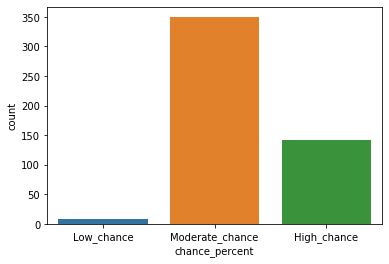

In [83]:
sns.countplot(df.chance_percent)

#### More Students have Moderate_Chance of getting admission  

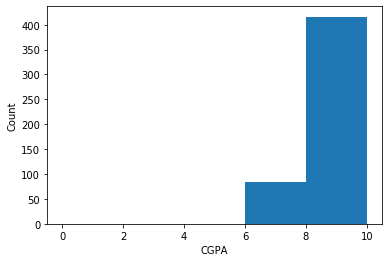

In [84]:
plt.hist(df.CGPA,bins=[0,2,4,6,8,10])
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()

#### Student having CGPA 8-10 is has more count

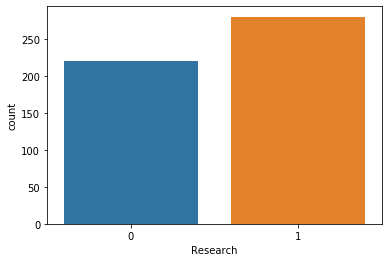

In [85]:
sns.countplot(df.Research)

## Question 7

### Using boxplot, visualize the outliers if present in the dataset


count    500.000000
mean     316.472000
std       11.295148
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: GRE Score, dtype: float64

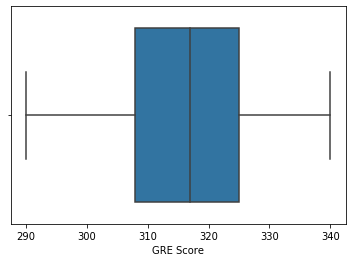

In [86]:
sns.boxplot('GRE Score',data=df)
df['GRE Score'].describe()

#### There are no Outliers

In [87]:
#from above figure and data,
Q1=308
Q2=317
Q3=325
# inter quartile range:
IQR=Q3-Q1
## outliers are values
# >=Q3+1.5*IQR
# <=Q1-1.5*IQR
k1=Q3+1.5*IQR
k2=Q1-1.5*IQR
outliers=df[(df["GRE Score"]<=k2)|(df["GRE Score"]>=k1)]
outliers

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,chance_percent


#### There are no extreme values , i.e., There are no Outliers from the dataset

### Question 8

### Identify the Output column in the dataset and divide the entire dataset into Input and Output; create the training and testing datasets.


In [88]:
X = df.iloc[:,:]
X = X.drop(['chance_percent'],axis = 1)
X.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [89]:
y = df['chance_percent']
y

0          High_chance
1      Moderate_chance
2      Moderate_chance
3      Moderate_chance
4      Moderate_chance
            ...       
495        High_chance
496        High_chance
497        High_chance
498    Moderate_chance
499        High_chance
Name: chance_percent, Length: 500, dtype: category
Categories (3, object): [Low_chance < Moderate_chance < High_chance]

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 1)

In [91]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(375, 9)
(125, 9)
(375,)
(125,)


## Question 9

### If your data requires scaling to be done, apply the feature scaling


#### No Feature Scaling Required,we're predicting labels made for chance_percent